# Project: Communicate Data Findings about Lyft´s Bay Wheels 2019


## Table Of Content

- [Introduction](#intro)
- [Preliminary Data Wrangling](#wrangling)
 - [Gathering Data](#gather)
 - [Assessing Data](#assess)
 - [Cleaning Data](#clean)
 - [Storing Data](#storing)
- [Data Exploration](#exploration)
 - [Univariate Exploration](#explor_uni)
 - [Bivariate Exploration & Multivariate Exploration](#explor_multi)
- [Summary](#summary)
- [References](#references)


<a id='intro'></a>
## Introduction
Lyft´s Bay Wheels (formerly known as Ford GoBike) is a bicycle sharing system in the San Francisco Bay Area, California. The dataset Lyft is offering contains information about the duration, starting and end point of the trip, as well as additional information about the user and the trip itself. The data are saved in monthly csv files. Within this project I will analyse the program data for the year 2019. <br>

The data was downloaded from the following page: https://www.lyft.com/bikes/bay-wheels/system-data. <br>

In [1]:
# import packages

import pandas as pd
# import numpy
import numpy as np
# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn
import seaborn as sns
# import glob
import glob
# import package for file handling
import os

<a id='wrangling'></a>
## Preliminary Data Wrangling
The preliminary data wrangling process consists of four parts. In this project the data are saved in twelve individual csv files which corresponds to each month of the year 2019. Within the first part, Gathering Data, all the files will be read and the corresponding data frames will be concatenated into the data frame df. Subsequently, the data will be assessed and the quality and tidiness issues collected. Afterwards, the identified quality and tidiness issues will be cleaned. In the last part of the data wrangling section, the cleaned data will be stored in a new csv file that the cleaning steps do not need to be repeated in the future. 

<a id='gather'></a>
### Gathering Data

In [2]:
# check if merged file already exists
# if not: create a merged file out of the 12 single files
if os.path.isfile('2019-baywheels-tripdata.csv'):
    print ("Merged file exists")
    df = pd.read_csv('2019-baywheels-tripdata.csv');
    print('File content loaded into data frame')
else:
    print ("File does not exist. Creating merged file...")
    # get all csv files in folder
    files = glob.glob(os.path.join("*.csv"));
    # create temp. data
    tmp_frames = [pd.read_csv(f) for f in files];
    # create data frame
    df = pd.concat(tmp_frames, ignore_index=True);
    # write concatenated data frames into 1 csv file
    df.to_csv('2019-baywheels-tripdata.csv', index = False);
    print('Created merged file 2019-baywheels-tripdata.csv')

Merged file exists


D:\Users\jklinder\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


File content loaded into data frame


<a id='assessing'></a>
### Assessing Data

In [3]:
# get data frame information
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   duration_sec             2506983 non-null  int64  
 1   start_time               2506983 non-null  object 
 2   end_time                 2506983 non-null  object 
 3   start_station_id         2426249 non-null  float64
 4   start_station_name       2426850 non-null  object 
 5   start_station_latitude   2506983 non-null  float64
 6   start_station_longitude  2506983 non-null  float64
 7   end_station_id           2424081 non-null  float64
 8   end_station_name         2424633 non-null  object 
 9   end_station_latitude     2506983 non-null  float64
 10  end_station_longitude    2506983 non-null  float64
 11  bike_id                  2506983 non-null  int64  
 12  user_type                2506983 non-null  object 
 13  bike_share_for_all_trip  2263724 non-null 

In [4]:
# get 10 sample entries
df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
1736223,940,2019-09-27 10:02:15.4250,2019-09-27 10:17:56.1400,71.0,Broderick St at Oak St,37.773063,-122.439078,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,2440,Customer,No,NaN
758433,217,2019-04-12 07:26:49.1670,2019-04-12 07:30:26.3250,375.0,Grove St at Masonic Ave,37.774836,-122.446546,53.0,Grove St at Divisadero,37.775946,-122.437777,5059,Subscriber,No,NaN
2205327,1467,2019-11-21 21:24:18.7300,2019-11-21 21:48:46.4790,371.0,Lombard St at Columbus Ave,37.802746,-122.413579,323.0,Broadway at Kearny,37.798014,-122.405950,3115,Customer,No,NaN
334805,1013,2019-02-07 16:40:21.6670,2019-02-07 16:57:15.0240,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,73.0,Pierce St at Haight St,37.771793,-122.433708,4404,Subscriber,No,NaN
225781,1670,2019-02-24 10:33:31.5670,2019-02-24 11:01:22.1580,192.0,37th St at West St,37.826696,-122.271797,267.0,Derby St at College Ave,37.861804,-122.253569,877,Customer,No,NaN
1520884,261,2019-08-29 08:16:38.5310,2019-08-29 08:20:59.7590,315.0,Market St at 45th St,37.834174,-122.272968,176.0,MacArthur BART Station,37.828410,-122.266315,476,Subscriber,No,NaN
972966,870,2019-05-13 19:37:54.2890,2019-05-13 19:52:24.9500,146.0,30th St at San Jose Ave,37.742314,-122.423181,95.0,Sanchez St at 15th St,37.766219,-122.431060,1852,Subscriber,No,NaN
2484995,274,2019-12-04 11:56:10,2019-12-04 12:00:44,NaN,NaN,37.332564,-121.880271,NaN,NaN,37.342357,-121.883577,560815,Subscriber,NaN,clipper
1620556,1338,2019-08-14 22:30:52.8010,2019-08-14 22:53:11.2690,276.0,Julian St at The Alameda,37.332233,-121.912516,276.0,Julian St at The Alameda,37.332233,-121.912516,9241,Subscriber,Yes,NaN
1995863,238,2019-10-23 16:36:42.6390,2019-10-23 16:40:40.8690,166.0,College Ave at Alcatraz Ave,37.851376,-122.252523,168.0,Alcatraz Ave at Shattuck Ave,37.849595,-122.265569,11543,Subscriber,No,NaN


In [5]:
# get first statistical overview
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,2.506983e+06,2.426249e+06,2.506983e+06,2.506983e+06,2.424081e+06,2.506983e+06,2.506983e+06,2.506983e+06
mean,8.076483e+02,1.465047e+02,3.776506e+01,-1.223499e+02,1.427044e+02,3.776422e+01,-1.223459e+02,2.789833e+04
std,1.974714e+03,1.223171e+02,1.363698e-01,3.089648e-01,1.214296e+02,2.392885e-01,7.080417e-01,1.146067e+05
min,6.000000e+01,3.000000e+00,0.000000e+00,-1.225143e+02,3.000000e+00,0.000000e+00,-1.225143e+02,4.000000e+00
25%,3.590000e+02,4.700000e+01,3.776931e+01,-1.224130e+02,4.300000e+01,3.777003e+01,-1.224117e+02,1.952000e+03
50%,5.710000e+02,1.050000e+02,3.778053e+01,-1.223983e+02,1.010000e+02,3.778076e+01,-1.223981e+02,4.420000e+03
75%,8.870000e+02,2.430000e+02,3.779539e+01,-1.222914e+02,2.390000e+02,3.779587e+01,-1.222934e+02,9.682000e+03
max,9.121100e+05,4.980000e+02,4.551000e+01,0.000000e+00,4.980000e+02,4.551000e+01,0.000000e+00,9.999410e+05


In [6]:
# check duplicates
df.duplicated().sum()

0

In [7]:
# percentage of NaN for bike_share_for_all_trip
df.bike_share_for_all_trip.isna().sum() / df.shape[0]

0.09703256862930462

In [8]:
# show entries with a value in the column bike_share_for_all_trip
df[df.bike_share_for_all_trip.notna()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,NaN
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2355466,479,2019-11-01 00:02:50.4850,2019-11-01 00:10:50.4430,86.0,Market St at Dolores St,37.769305,-122.426826,365.0,Turk St at Fillmore St,37.780450,-122.431946,495,Subscriber,Yes,NaN
2355467,161,2019-11-01 00:08:07.4650,2019-11-01 00:10:48.5700,114.0,Rhode Island St at 17th St,37.764478,-122.402570,345.0,Hubbell St at 16th St,37.766483,-122.398279,1420,Customer,No,NaN
2355468,180,2019-11-01 00:06:58.1730,2019-11-01 00:09:58.4070,160.0,West Oakland BART Station,37.805318,-122.294837,235.0,Union St at 10th St,37.807239,-122.289370,2997,Subscriber,No,NaN
2355469,262,2019-11-01 00:04:08.4600,2019-11-01 00:08:30.6760,465.0,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,38.0,The Embarcadero at Pier 38,37.782926,-122.387921,204,Subscriber,No,NaN


In [9]:
# percentage of NaN for rental_access_method
df.rental_access_method.isna().sum() / df.shape[0]

0.9517994338214499

In [10]:
# show entries with a value in the column rental_access_method
df[df.rental_access_method.notna()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
1240946,511,2019-06-20 19:08:25,2019-06-20 19:16:57,NaN,NaN,37.290060,-121.880718,NaN,NaN,37.300379,-121.880062,773766,Customer,NaN,app
1240947,592,2019-06-21 13:44:35,2019-06-21 13:54:27,NaN,NaN,37.291543,-121.879599,NaN,NaN,37.313545,-121.888996,630873,Customer,NaN,app
1240948,1648,2019-06-20 21:21:27,2019-06-20 21:48:55,NaN,NaN,37.293723,-121.911107,NaN,NaN,37.296621,-121.913399,205087,Customer,NaN,app
1240949,1074,2019-06-25 11:31:45,2019-06-25 11:49:39,NaN,NaN,37.293870,-121.906131,NaN,NaN,37.310521,-121.887427,189672,Customer,NaN,app
1240950,1646,2019-06-21 15:23:48,2019-06-21 15:51:15,NaN,NaN,37.294886,-121.908596,NaN,NaN,37.314102,-121.890535,455816,Subscriber,NaN,app
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2506978,731,2019-12-28 18:37:29,2019-12-28 18:49:40,NaN,NaN,37.809731,-122.409855,NaN,NaN,37.807573,-122.421681,719651,Subscriber,NaN,app
2506979,748,2019-12-28 18:37:24,2019-12-28 18:49:53,NaN,NaN,37.809768,-122.409797,NaN,NaN,37.807558,-122.421638,655411,Subscriber,NaN,app
2506980,1044,2019-12-26 14:25:37,2019-12-26 14:43:02,NaN,NaN,37.810183,-122.410271,NaN,NaN,37.807225,-122.408850,936881,Subscriber,NaN,app
2506981,326,2019-12-30 20:35:43,2019-12-30 20:41:09,NaN,NaN,37.810471,-122.417386,NaN,NaN,37.803143,-122.414373,397539,Subscriber,NaN,app


#### Summary of Issues  <br>


##### Quality Issues  <br>
- Q01: Change type of start_time, end_time to datetime  <br>
- Q02: Change type of start_station_id, end_station_id, bike_id to str <br>
- Q03: Add columns for the month and the day of the week <br>
- Q04: Add column for the seasons <br>
- Q05: Calculate distance and add a new column for it <br>
- Q06: Columns (13,14) have mixed types <br>

##### Tidiness Issues  <br>



<a id='cleaning'></a>
### Cleaning Data

In [11]:
# creating copy of data frame
df_clean = df.copy();

#### Q01: Change type of start_time, end_time to datetime

##### Define
Change type of start_time and end_time to datetime

##### Code

In [12]:
# change data type to datetime
df_clean['start_time'] = pd.to_datetime(df_clean['start_time']);
# change data type to datetime
df_clean['end_time'] = pd.to_datetime(df_clean['end_time']);

##### Test

In [13]:
# get data frame information
df_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             2506983 non-null  int64         
 1   start_time               2506983 non-null  datetime64[ns]
 2   end_time                 2506983 non-null  datetime64[ns]
 3   start_station_id         2426249 non-null  float64       
 4   start_station_name       2426850 non-null  object        
 5   start_station_latitude   2506983 non-null  float64       
 6   start_station_longitude  2506983 non-null  float64       
 7   end_station_id           2424081 non-null  float64       
 8   end_station_name         2424633 non-null  object        
 9   end_station_latitude     2506983 non-null  float64       
 10  end_station_longitude    2506983 non-null  float64       
 11  bike_id                  2506983 non-null  int64         
 12  

#### Q02: Change type of start_station_id, end_station_id, bike_id to str

##### Define
Change type of start_station_id, end_station_id, bike_id to str. No need for the ID´s to be an int, because the ID´s will not be used for any numeric calculation. 

##### Code

In [14]:
# change data type to str 
df_clean = df_clean.astype({'start_station_id': str}) 
df_clean = df_clean.astype({'end_station_id': str}) 
df_clean = df_clean.astype({'bike_id': str}) 

##### Test

In [15]:
# get data frame information
df_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             2506983 non-null  int64         
 1   start_time               2506983 non-null  datetime64[ns]
 2   end_time                 2506983 non-null  datetime64[ns]
 3   start_station_id         2506983 non-null  object        
 4   start_station_name       2426850 non-null  object        
 5   start_station_latitude   2506983 non-null  float64       
 6   start_station_longitude  2506983 non-null  float64       
 7   end_station_id           2506983 non-null  object        
 8   end_station_name         2424633 non-null  object        
 9   end_station_latitude     2506983 non-null  float64       
 10  end_station_longitude    2506983 non-null  float64       
 11  bike_id                  2506983 non-null  object        
 12  

#### Q03: Add columns for the month and the day of the week

##### Define
Add a column for the month and the day of the week. <br>

##### Code

In [16]:
# create empty column 'month'
df_clean["month"] = np.nan
# create empty column 'day_of_week'
df_clean["day_of_week"] = np.nan
# create empty column 'hour'
df_clean["hour"] = np.nan

In [17]:
# get month of the data frame using the date of column start_time
df_clean["month"] = df_clean.start_time.dt.month_name()
# get the day of the week of the data frame using the date of column start_time
df_clean["day_of_week"] = df_clean.start_time.dt.dayofweek
# get the hour of the data frame using the date of column start_time
df_clean["hour"] = df_clean.start_time.dt.hour

##### Test

In [18]:
df_clean.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,month,day_of_week,hour
540087,91,2019-03-13 12:00:58.760,2019-03-13 12:02:30.536,16.0,Steuart St at Market St,37.794130,-122.394430,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,5261,Subscriber,Yes,NaN,March,2,12
2373015,278,2019-12-22 09:01:32.470,2019-12-22 09:06:10.957,372.0,Madison St at 17th St,37.804037,-122.262409,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,613,Customer,NaN,NaN,December,6,9
210053,770,2019-02-26 19:50:49.061,2019-02-26 20:03:39.214,114.0,Rhode Island St at 17th St,37.764478,-122.402570,343.0,Bryant St at 2nd St,37.783172,-122.393572,5279,Subscriber,No,NaN,February,1,19
1743802,323,2019-09-26 12:59:19.611,2019-09-26 13:04:43.076,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,25.0,Howard St at 2nd St,37.786928,-122.398113,12001,Subscriber,No,NaN,September,3,12
2443988,1950,2019-12-08 16:31:20.905,2019-12-08 17:03:51.368,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,376.0,Illinois St at 20th St,37.760458,-122.387540,12659,Subscriber,NaN,NaN,December,6,16


#### Q04: Add column for the seasons

##### Define
Add a column for the season of the start_time. <br>
The meteorological temperate seasons will be used for the definition of the seasons. <br>

##### Code

In [19]:
# create empty column 'season'
df_clean["season"] = np.nan

In [20]:
# Winter: 1 December - 28 February 
df_clean.loc[df_clean.month == 'December', 'season'] = 'Winter'
df_clean.loc[df_clean.month == 'January', 'season'] = 'Winter'
df_clean.loc[df_clean.month == 'February', 'season'] = 'Winter'

# Spring: 1 March - 31 May 
df_clean.loc[df_clean.month == 'March', 'season'] = 'Spring'
df_clean.loc[df_clean.month == 'April', 'season'] = 'Spring'
df_clean.loc[df_clean.month == 'May', 'season'] = 'Spring'

# Summer: 1 June - 31 August 
df_clean.loc[df_clean.month == 'June', 'season'] = 'Summer'
df_clean.loc[df_clean.month == 'July', 'season'] = 'Summer'
df_clean.loc[df_clean.month == 'August', 'season'] = 'Summer'

# Autumn: 1 September - 30 November 
df_clean.loc[df_clean.month == 'September', 'season'] = 'Autumn'
df_clean.loc[df_clean.month == 'October', 'season'] = 'Autumn'
df_clean.loc[df_clean.month == 'November', 'season'] = 'Autumn'

##### Test

In [21]:
df_clean.sample(10).season

1063333    Summer
1328849    Summer
1209730    Summer
516949     Spring
1791299    Autumn
2058838    Autumn
1753375    Autumn
2348494    Autumn
898073     Spring
2087126    Autumn
Name: season, dtype: object

#### Q05: Calculate distance and add a new column for it

##### Define
Calculate the distance between the start station and end station. <br>
This will be done by using the Haversine formula to calculate the shortest distance on the surface of a sphere. <br>

##### Code

In [22]:
# create empty column 'distance'
df_clean["distance_km"] = np.nan

In [23]:
# Use Haversine formula to calculate the shortest distance on the surface of a sphere
p = np.pi/180 # Factor to get angle in degree to rad
R = 6371; # Mean Earth radius [km]
h = np.sin((df_clean.end_station_latitude - df_clean.start_station_latitude)*p/2) ** 2 + np.cos(df_clean.start_station_latitude*p) * np.cos(df_clean.end_station_latitude*p) * np.sin((df_clean.end_station_longitude - df_clean.start_station_longitude)*p/2) ** 2
df_clean["distance_km"] = 2 * R * np.arcsin(np.sqrt(h)) 
# check if all distances are less than the earth Earth diameter, otherwise remove Earth diameter (= sign problem in these rows)
df_clean.loc[df_clean.distance_km > 2*R, 'distance_km'] = df_clean.distance_km - 2*R

##### Test

In [24]:
df_clean.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,month,day_of_week,hour,season,distance_km
905159,589,2019-05-26 10:50:19.738,2019-05-26 11:00:08.778,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,90.0,Townsend St at 7th St,37.771058,-122.402717,2497,Subscriber,No,NaN,May,6,10,Spring,1.514036
2413349,317,2019-12-13 16:18:41.917,2019-12-13 16:23:59.078,166.0,College Ave at Alcatraz Ave,37.851376,-122.252523,248.0,Telegraph Ave at Ashby Ave,37.855956,-122.259795,309,Subscriber,NaN,NaN,December,4,16,Winter,0.816690
2289783,328,2019-11-10 16:04:13.871,2019-11-10 16:09:42.051,375.0,Grove St at Masonic Ave,37.774836,-122.446546,53.0,Grove St at Divisadero,37.775946,-122.437777,10207,Subscriber,Yes,NaN,November,6,16,Autumn,0.780454
1288988,509,2019-07-23 18:03:17.836,2019-07-23 18:11:47.660,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,2117,Subscriber,No,NaN,July,1,18,Summer,1.493184
729093,361,2019-04-15 20:00:37.279,2019-04-15 20:06:39.237,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,36.0,Folsom St at 3rd St,37.783830,-122.398870,1400,Subscriber,No,NaN,April,0,20,Spring,0.863776
1246649,1463,2019-07-31 18:07:42.018,2019-07-31 18:32:05.453,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,125.0,20th St at Bryant St,37.759200,-122.409851,1565,Subscriber,No,NaN,July,2,18,Summer,3.950393
2227824,458,2019-11-19 09:02:38.216,2019-11-19 09:10:16.741,223.0,16th St Mission BART Station 2,37.764765,-122.420091,124.0,19th St at Florida St,37.760447,-122.410807,12048,Subscriber,No,NaN,November,1,9,Autumn,0.946899
781126,267,2019-04-10 08:59:51.611,2019-04-10 09:04:19.231,182.0,19th Street BART Station,37.809013,-122.268247,178.0,Broadway at 30th St,37.819381,-122.261928,4829,Subscriber,No,NaN,April,2,8,Spring,1.279619
1924568,321,2019-09-02 21:47:45.765,2019-09-02 21:53:07.195,317.0,San Salvador St at 9th St,37.333955,-121.877349,296.0,5th St at Virginia St,37.325998,-121.877120,7141,Subscriber,Yes,NaN,September,0,21,Autumn,0.884965
1061366,826,2019-06-28 22:27:43.017,2019-06-28 22:41:29.444,349.0,Howard St at Mary St,37.781010,-122.405666,92.0,Mission Bay Kids Park,37.772301,-122.393028,1217,Subscriber,No,NaN,June,4,22,Summer,1.473658


#### Q06: Columns (13,14) have mixed types

##### Define
Columns 13 and 14 have missing entries. <br>
They are imported as 'nan' for the missing entries and strings ('Yes' and 'No' for column bike_share_for_all_trip, respectively 'app' and 'clipper' for column rental_access_method). <br>
Therefore, replace nan in type object with NULL. <br>

##### Code

In [25]:
# missing entries in columns bike_share_for_all_trip & rental_access_method lead to different types (nan and strings)
# this will be corrected by this code
for col in df_clean.select_dtypes(include='object').columns:
    df_clean[col] = df_clean[col].str.strip().str.lower().fillna('NULL')

##### Test

In [26]:
df_clean.rental_access_method.unique()

array(['NULL', 'app', 'clipper'], dtype=object)

In [27]:
df_clean.bike_share_for_all_trip.unique()

array(['no', 'yes', 'NULL'], dtype=object)

<a id='storing'></a>
### Storing Data
Storing the clean data in an additional csv file which can be loaded without rerunning the above code. 

In [28]:
# store cleaned data in new csv file
df_clean.to_csv('2019-baywheels-tripdata-clean.csv', index = False)

In [29]:
# check if cleaned csv file exists
if os.path.isfile('2019-baywheels-tripdata-clean.csv'):
    print ("Cleaned file exists")
else:
    print ("Cleaned file does NOT exist")

Cleaned file exists


<a id='exploration'></a>
## Data Exploration
I will try to answer the following questions within this section:
- Is the usage of the bike sharing system correlated with
 - the season?
 - the month?
 - the day of the week?
 - the hour of the day?
 - the user type
- How long does an average trip takes, in terms of time and distance. Is it depended on 
 - the user type?
 - the season?
 - the month?
 - the day of the week?
 - the hour of the day?

In [30]:
# load cleaned csv file just needed to avoid running all the above code again and save time

# check if data frame df_clean exists
if 'df_clean' in locals():
    print('Data frame df_clean already exists')
else:
    print('Data frame df_clean does not exist. Will be loaded...')
    df_clean = pd.read_csv('2019-baywheels-tripdata-clean.csv');
    print('Data frame df_clean loaded.')
    # Q5 cleaning have to be repeated after each file load or column entry needs to be changed
    for col in df_clean.select_dtypes(include='object').columns:
        df_clean[col] = df_clean[col].str.strip().str.lower().fillna('NULL')
    print('mixed types issue fixed.')

# show 5 samples of df_clean
df_clean.sample(5)

Data frame df_clean already exists


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,month,day_of_week,hour,season,distance_km
359695,826,2019-02-04 16:58:24.396,2019-02-04 17:12:11.095,9.0,broadway at battery st,37.798572,-122.400869,66.0,3rd st at townsend st,37.778742,-122.392741,5566,customer,no,NULL,february,0,16,winter,2.317847
315369,488,2019-02-11 09:33:36.848,2019-02-11 09:41:45.343,195.0,bay pl at vernon st,37.812314,-122.260779,7.0,frank h ogawa plaza,37.804562,-122.271738,4913,subscriber,no,NULL,february,0,9,winter,1.292269
1698331,573,2019-08-03 10:58:06.079,2019-08-03 11:07:39.851,16.0,steuart st at market st,37.794130,-122.394430,3.0,powell st bart station (market st at 4th st),37.786375,-122.404904,2765,subscriber,no,NULL,august,5,10,summer,1.261228
1111010,408,2019-06-21 10:07:14.559,2019-06-21 10:14:02.850,37.0,2nd st at folsom st,37.785377,-122.396906,364.0,china basin st at 3rd st,37.772000,-122.389970,2326,subscriber,no,NULL,june,4,10,summer,1.607523
1933560,2191,2019-10-31 17:25:15.461,2019-10-31 18:01:46.819,265.0,ninth st at parker st,37.858868,-122.291209,233.0,4th ave at e 12th st (temporary location),37.795913,-122.255547,3619,subscriber,no,NULL,october,3,17,autumn,7.669080


<a id='explor_uni'></a>
### Univariate Exploration

Within this part I will analyse the dataset and try to answer the following questions:
- What is the distribution of 
 - the user type?
 - the "Bike share for all trip"?
 - the rental method?
- Is the usage of the bike sharing system correlated with
 - the season?
 - the month?
 - the day of the week?
 - the hour of the day?
 - the user type?
 - the duration?
 - the distance?

#### User Type Distribution

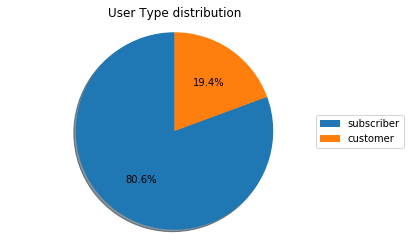

In [31]:
# Pie chart for user type, where the slices will be ordered and plotted counter-clockwise:
labels = 'subscriber', 'customer'
sizes = df_clean.user_type.value_counts()
explode = (0, 0)

#fig1, ax1 = plt.subplots()
plt.pie(sizes, explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels=labels, bbox_to_anchor=(1.2,0.5), loc='right')
plt.title('User Type distribution')
plt.show()

~80% of the users are members, while ~20% of the users are casual customers.

#### Bike share for all trip Distribution

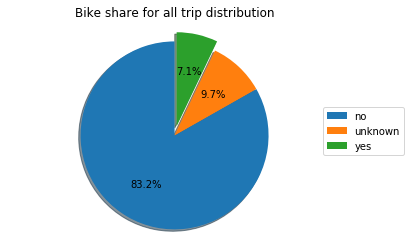

In [32]:
# Pie chart for user type, where the slices will be ordered and plotted counter-clockwise:
labels = 'no', 'unknown', 'yes'
sizes = df_clean.bike_share_for_all_trip.value_counts()
explode = (0, 0, 0.1)

#fig1, ax1 = plt.subplots()
plt.pie(sizes, explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels=labels, bbox_to_anchor=(1.2,0.5), loc='right')
plt.title('Bike share for all trip distribution')
plt.show()

The dataset contains for around 10% of the users no information about the usage of the bike share for all trip. Just about 7% of the users use the bike sharing system for all trip, while most of the users (~83%) do not use the bike share for all trip option.

#### Rental Access Method Distribution

In [33]:
# percentage of Null entries for rental_access_method
df_clean.query('rental_access_method != "NULL"').shape[0] / df.shape[0]

0.04820056617855007

In [34]:
df_clean.query('rental_access_method != "NULL"').month.unique()

array(['june', 'july', 'november', 'december'], dtype=object)

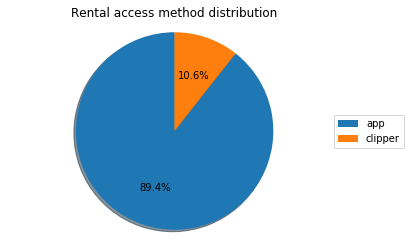

In [35]:
# Pie chart for user type, where the slices will be ordered and plotted counter-clockwise:
labels = 'app', 'clipper'
sizes = df_clean.query('rental_access_method != "NULL"').rental_access_method.value_counts()
explode = (0, 0)

#fig1, ax1 = plt.subplots()
plt.pie(sizes, explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels=labels, bbox_to_anchor=(1.2,0.5), loc='right')
plt.title('Rental access method distribution')
plt.show()

Just around 4% of all entries in the dataset contain information about the rental access method. These entries were collected in the months: June, July, November and December. It is unclear why Lyft collected or published just the access methods for these four months. If one takes a closer look at the published data, one sees that around 90% of the users used the app for sharing a bike. 

#### Bike rides per day of the week

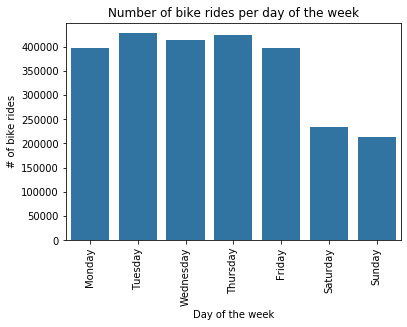

In [36]:
# bike rides per day of the week
base_color = sns.color_palette()[0]
label_weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.countplot(data = df_clean, x = 'day_of_week', color = base_color);
# plot settings
plt.title('Number of bike rides per day of the week');
plt.ylabel('# of bike rides');
plt.xlabel('Day of the week');
plt.xticks([0,1,2,3,4,5,6], label_weekdays, rotation=90);

In [37]:
usage_per_weekday = df_clean.day_of_week.value_counts()
usage_per_weekday

1    427640
3    424474
2    414448
4    397284
0    396463
5    234370
6    212304
Name: day_of_week, dtype: int64

In [38]:
usage_per_weekday[5:7].mean() / usage_per_weekday[0:5].mean()

0.5419987972677884

Within the weekdays the usage of the bike sharing system is almost on the same level, while the number of bike rentals drop down to 54% during the weekend. It seems that the Lyft Bay Wheels system is mainly used by people working during the week.

#### Bike rides depending on the hour of the day

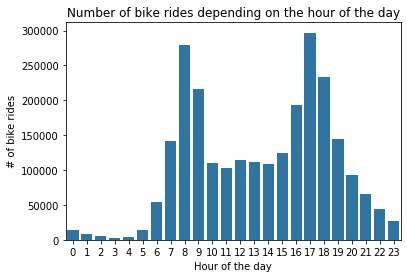

In [39]:
# bike rides depending on the hour of the day
base_color = sns.color_palette()[0]

sns.countplot(data = df_clean, x = 'hour', color = base_color);
# plot settings
plt.title('Number of bike rides depending on the hour of the day');
plt.ylabel('# of bike rides');
plt.xlabel('Hour of the day');

The main usage of the bike sharing system is during the day with high peaks between 7am and 9am as well as between 4pm and 6pm which is an additional indicator that the bike sharing system in mainly used to go to the office or coming back. 

#### Bike rides per month of the year

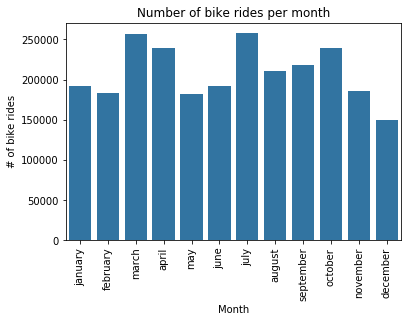

In [40]:
# bike rides per month
base_color = sns.color_palette()[0]
sns.countplot(data = df_clean, x = 'month', color = base_color);
# plot settings
plt.title('Number of bike rides per month');
plt.ylabel('# of bike rides');
plt.xlabel('Month');
plt.xticks(rotation=90);

In [41]:
usage_per_month = df_clean.month.value_counts()
usage_per_month

july         258102
march        256299
october      239895
april        239111
september    217986
august       210563
january      192082
june         191772
november     185496
february     183412
may          182163
december     150102
Name: month, dtype: int64

The most bike rentals are registered in July and March, followed by October and April. The least were documented in December followed with a bigger gap by May, February and November. The reduced usage of the bike sharing system in the late autumn and winter month are expected, because the weather is normally worst in these month. But fr further investigation one would need for information about the weather conditions. 

#### Bike rides per season of the year

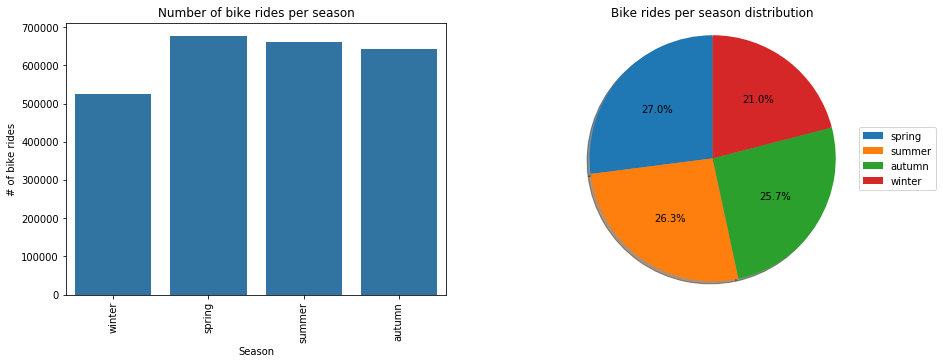

In [42]:
# bike rides per season
plt.figure(figsize = [15, 5])

# left countplot: 
plt.subplot(1, 2, 1)
base_color = sns.color_palette()[0]
sns.countplot(data = df_clean, x = 'season', color = base_color);
# plot settings
plt.title('Number of bike rides per season');
plt.ylabel('# of bike rides');
plt.xlabel('Season');
plt.xticks(rotation=90);

# left histogram: data plotted in natural units
plt.subplot(1, 2, 2)
sizes = df_clean.season.value_counts()
labels = sizes.index
explode = (0, 0, 0 , 0)

#fig1, ax1 = plt.subplots()
plt.pie(sizes, explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels=labels, bbox_to_anchor=(1.1,0.5), loc='right')
plt.title('Bike rides per season distribution')
plt.show()

The least bike rentals are counted in the winter with 21%, while the other three seasons are in the same range of 25.7% for autumn up to 27% for spring. 

#### Bike rides depending on the duration

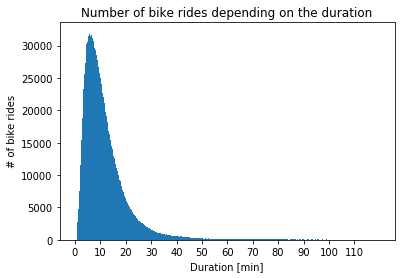

In [43]:
# histogram: bike rides per duration
base_color = sns.color_palette()[0]
df_duration = df_clean.query('duration_sec <= 7200')
bin_edges = np.arange(0, df_duration['duration_sec'].max()+1, 10)
ticks = np.arange(0, df_duration['duration_sec'].max()+1, 600)
label_weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.hist(data = df_duration, x = 'duration_sec', bins = bin_edges, color = base_color)
# plot settings
plt.title('Number of bike rides depending on the duration');
plt.ylabel('# of bike rides');
plt.xlabel('Duration [min]');
plt.xticks(ticks, [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], rotation=0);

In [44]:
df_duration.query('duration_sec <= 900').shape[0] / df_clean.shape[0]

0.757212553894462

About 75% of the users rent the bike for 15min or less. So the main usage of the bikes is for short periods of time. 

#### Bike rides depending on the distance

In [45]:
df_distance = df_clean.query('distance_km <= 10')
df_distance.shape[0] / df_clean.shape[0]

0.9999030707428012

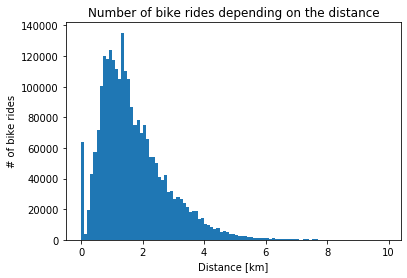

In [46]:
# histogram: bike rides per distance
base_color = sns.color_palette()[0]

bin_edges = np.arange(0, df_distance['distance_km'].max(), 0.1)
#ticks = np.arange(0, df_duration['duration_sec'].max()+1, 600)

plt.hist(data = df_distance, x = 'distance_km', bins = bin_edges, color = base_color)
# plot settings
plt.title('Number of bike rides depending on the distance');
plt.ylabel('# of bike rides');
plt.xlabel('Distance [km]');

In [47]:
df_clean.distance_km.describe()

count    2.506983e+06
mean     1.700373e+00
std      1.137079e+00
min      0.000000e+00
25%      9.280850e-01
50%      1.453611e+00
75%      2.236969e+00
max      1.429716e+02
Name: distance_km, dtype: float64

More than 99.9% of the rented bikes have been used for distances below 10km. More precise, even 75% of the users rented bikes for distances less than 2.3km. Therefore, one can predict that the bike sharing system is used mainly for short distances. 

<a id='explor_multi'></a>
## Bivariate Exploration & Multivariate Exploration

Within this part I will analyse the dataset and try to answer the following questions:
- How long does an average trip takes, in terms of time and distance. Is it depended on 
 - the user type?
 - the season?
 - the month?
 - the day of the week?
 - the hour of the day?

### Duration depening on the day of the week

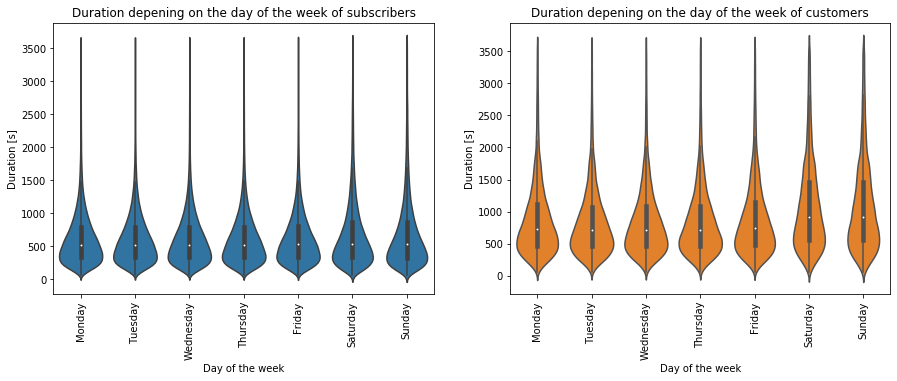

In [48]:
# Duration depening on the day of the week
plt.figure(figsize = [15, 5])
subscriber_color = sns.color_palette()[0]
customer_color = sns.color_palette()[1]

# first plot
plt.subplot(1, 2, 1)
# create a violinplot taking into account only the data with a duration smaller than 1h (3600s) for a better visualization
sns.violinplot(data = df_clean[df_clean.user_type == 'subscriber'].query('duration_sec < 3600'), x = 'day_of_week', y = 'duration_sec', color = subscriber_color)
# plot settings
plt.title('Duration depening on the day of the week of subscribers')
plt.xlabel('Day of the week');
label_weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks([0,1,2,3,4,5,6], label_weekdays, rotation=90);
plt.ylabel('Duration [s]');


# second plot
plt.subplot(1, 2, 2)
# create a violinplot taking into account only the data with a duration smaller than 1h (3600s) for a better visualization
sns.violinplot(data = df_clean[df_clean.user_type == 'customer'].query('duration_sec < 3600'), x = 'day_of_week', y = 'duration_sec', color = customer_color)
# plot settings
plt.title('Duration depening on the day of the week of customers')
plt.xlabel('Day of the week');
label_weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks([0,1,2,3,4,5,6], label_weekdays, rotation=90);
plt.ylabel('Duration [s]');

In [49]:
df_clean.groupby(['user_type','day_of_week']).duration_sec.describe()

count         mean          std   min    25%  \
user_type  day_of_week                                                    
customer   0             66529.0  1245.278495  3351.281047  60.0  475.0   
           1             69048.0  1181.425371  3182.729694  60.0  467.0   
           2             66455.0  1169.764352  3111.308713  61.0  472.0   
           3             70393.0  1211.636356  4689.786687  60.0  473.0   
           4             75944.0  1251.248012  3121.570828  61.0  486.0   
           5             72705.0  1717.254013  4017.089604  60.0  584.0   
           6             64743.0  1711.122222  3941.182379  60.0  577.0   
subscriber 0            329934.0   662.692926  1211.308014  60.0  338.0   
           1            358592.0   655.947645  1091.327518  60.0  339.0   
           2            347993.0   659.933387  1165.208874  60.0  338.0   
           3            354081.0   656.612707  1109.283526  60.0  338.0   
           4            321340.0   669.959775  1202.800058  60.0  340.0   
           5            161665.0   760.729620  1507.083993  60.0  336.0   
           6            147561.0   761.536571  1560.663669  60.0  330.0   

                          50%     75%       max  
user_type  day_of_week                           
customer   0            750.0  1186.0   85904.0  
           1            728.0  1123.0   85952.0  
           2            734.0  1129.0   86230.0  
           3            738.0  1144.0  912110.0  
           4            770.0  1225.0   85676.0  
           5            986.0  1645.0   86217.0  
           6            984.0  1649.5   85492.0  
subscriber 0            528.0   798.0   84908.0  
           1            529.0   797.0   84792.0  
           2            530.0   799.0   85444.0  
           3            530.0   800.0   85081.0  
           4            531.0   805.0   82309.0  
           5            544.0   886.0   85935.0  
           6            538.0   882.0   86114.0

The mean duration of a shared bike is higher during the weekend than the days within the week for all users. Either the customers take longer bike tours or they are slower during the weekend. Eye-catching is in addition the fact that the mean duration is higher the customers compared to the subscribers, independent of the day of the week. 

### Distance depening on the day of the week

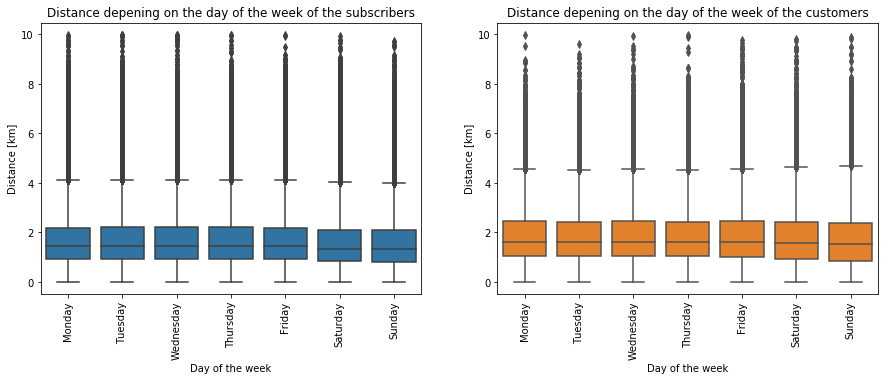

In [50]:
# Duration depening on the day of the week
plt.figure(figsize = [15, 5])
subscriber_color = sns.color_palette()[0]
customer_color = sns.color_palette()[1]

# first plot
plt.subplot(1, 2, 1)
sns.boxplot(data = df_clean[df_clean.user_type == 'subscriber'].query('distance_km < 10'), x = 'day_of_week', y = 'distance_km', color = subscriber_color)
# plot settings
plt.title('Distance depening on the day of the week of the subscribers')
plt.xlabel('Day of the week');
label_weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks([0,1,2,3,4,5,6], label_weekdays, rotation=90);
plt.ylabel('Distance [km]');

# second plot
plt.subplot(1, 2, 2)
sns.boxplot(data = df_clean[df_clean.user_type == 'customer'].query('distance_km < 10'), x = 'day_of_week', y = 'distance_km', color = customer_color)
# plot settings
plt.title('Distance depening on the day of the week of the customers')
plt.xlabel('Day of the week');
label_weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks([0,1,2,3,4,5,6], label_weekdays, rotation=90);
plt.ylabel('Distance [km]');

In [51]:
df_clean.groupby(['day_of_week']).distance_km.describe()

,count,mean,std,min,25%,50%,75%,max
day_of_week,,,,,,,,
0,396463.0,1.708759,1.099606,0.0,0.939640,1.464180,2.237958,57.727782
1,427640.0,1.715663,1.137125,0.0,0.945462,1.464180,2.246559,69.469241
2,414448.0,1.713832,1.119625,0.0,0.942192,1.470202,2.246559,142.971566
3,424474.0,1.713710,1.101575,0.0,0.942871,1.464180,2.250094,66.463759
4,397284.0,1.710570,1.095802,0.0,0.938722,1.464180,2.247563,61.259316
5,234370.0,1.656069,1.247225,0.0,0.854989,1.397596,2.214270,56.015271
6,212304.0,1.630800,1.248653,0.0,0.838993,1.372331,2.186957,65.318850


Evaluation the distance depending on the day of the week shows that the mean distance is smaller during the weekend than within the week. Taking into account the previous results that the mean duration of a bike share is higher during the weekends indicates that the users taking more time for the smaller distances and are therefore slower than during the week. 

### Number of bike rides depending on the day of the week and user type

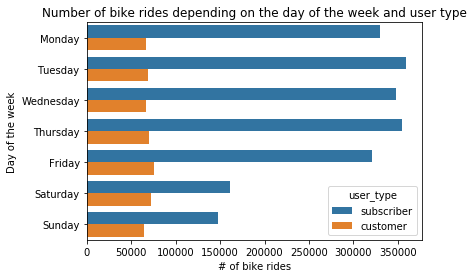

In [52]:
# Number of bike rides depending on the day of the week and user type
sns.countplot(data = df_clean, y = 'day_of_week', hue = 'user_type');

# plot settings
plt.title('Number of bike rides depending on the day of the week and user type');
plt.ylabel('Day of the week');
label_weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.yticks([0,1,2,3,4,5,6], label_weekdays, rotation=0);
plt.xlabel('# of bike rides');
plt.xticks(rotation=0);

The number of bike rides are pretty constant for the customers while there is a high discrepancy between the bike rides at the weekend and within the week for the subscibers. 

### Number of bike shares depending on the day of the week and the hour

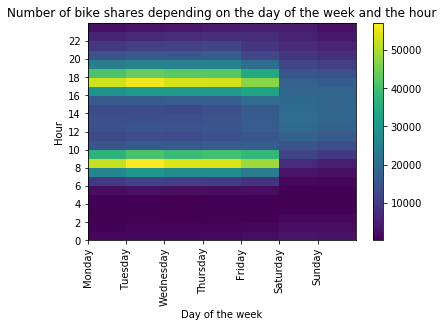

In [53]:
# Number of bike shares depending on the day of the week and the hour

#general settings
bins_x = np.arange(0, 8, 1)
bins_y = np.arange(0, 25, 1)
ticks_y = np.arange(0, 24, 2)

# plot 2D histogram
plt.hist2d(data = df_clean, x = 'day_of_week', y = 'hour', bins = [bins_x, bins_y])

# plot settings
plt.title('Number of bike shares depending on the day of the week and the hour')
plt.xlabel('Day of the week');
label_weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks([0,1,2,3,4,5,6], label_weekdays, rotation=90);
plt.ylabel('Hour');
plt.yticks(ticks_y);
plt.colorbar();

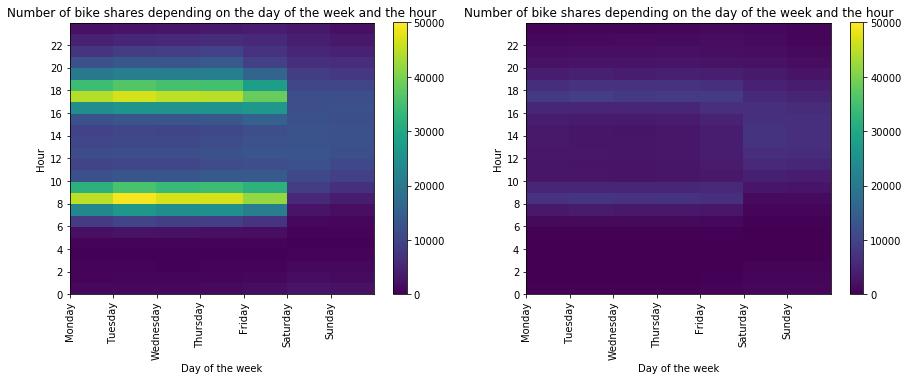

In [54]:
# Number of bike shares depending on the day of the week and the hour
plt.figure(figsize = [15, 5])

#left plot 
plt.subplot(1, 2, 1)
# plot 2D histogram
plt.hist2d(data = df_clean[df_clean.user_type == 'subscriber'], x = 'day_of_week', y = 'hour', bins = [bins_x, bins_y], vmin = 0, vmax = 50000)

# plot settings
plt.title('Number of bike shares depending on the day of the week and the hour')
plt.xlabel('Day of the week');
label_weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks([0,1,2,3,4,5,6], label_weekdays, rotation=90);
plt.ylabel('Hour');
plt.yticks(ticks_y);
plt.colorbar();

#right plot 
plt.subplot(1, 2, 2)
# plot 2D histogram
plt.hist2d(data = df_clean[df_clean.user_type == 'customer'], x = 'day_of_week', y = 'hour', bins = [bins_x, bins_y], vmin = 0, vmax = 50000)

# plot settings
plt.title('Number of bike shares depending on the day of the week and the hour')
plt.xlabel('Day of the week');
label_weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks([0,1,2,3,4,5,6], label_weekdays, rotation=90);
plt.ylabel('Hour');
plt.yticks(ticks_y);
plt.colorbar();

In the above heatmap is again pretty good visible that the main usage of the bike sharing system is during the week between 9am and 11am as well as between 4pm and 7pm. 

### Bike rides depending on the hour of the day and user type

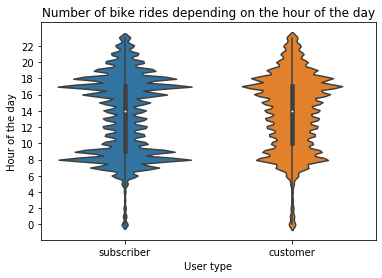

In [55]:
# bike rides depending on the hour of the day and user type

# create violinplot
sns.violinplot(data = df_clean, x = 'user_type', y = 'hour');
# plot settings
plt.title('Number of bike rides depending on the hour of the day');
plt.ylabel('Hour of the day');
plt.yticks(np.arange(0, 24, step=2), rotation=0);
plt.xlabel('User type');

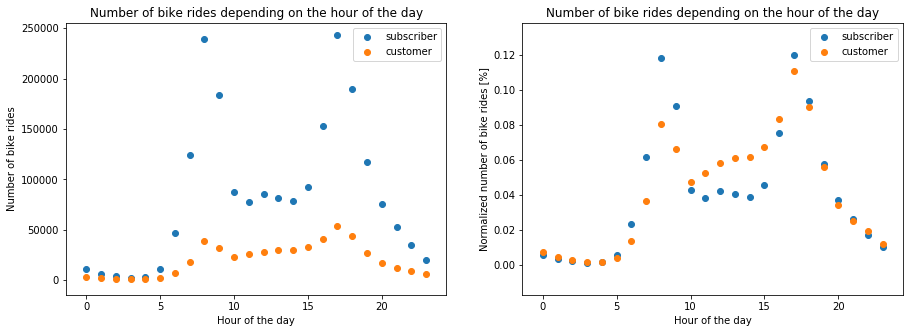

In [56]:
# bike rides depending on the hour of the day and user type
plt.figure(figsize = [15, 5])

# left countplot: 
plt.subplot(1, 2, 1)
# create scatterplot
plt.scatter(df_clean.query('user_type == "subscriber"').hour.value_counts().index, df_clean.query('user_type == "subscriber"').hour.value_counts(normalize=False), label = 'subscriber', color = subscriber_color);
plt.scatter(df_clean.query('user_type == "customer"').hour.value_counts().index, df_clean.query('user_type == "customer"').hour.value_counts(normalize=False), label = 'customer', color = customer_color);
# plot settings
plt.title('Number of bike rides depending on the hour of the day');
plt.ylabel('Number of bike rides');
#plt.yticks(np.arange(0, 24, step=2), rotation=0);
plt.xlabel('Hour of the day');
plt.legend()

# right countplot: 
plt.subplot(1, 2, 2)
# create scatterplot
plt.scatter(df_clean.query('user_type == "subscriber"').hour.value_counts().index, df_clean.query('user_type == "subscriber"').hour.value_counts(normalize=True), label = 'subscriber', color = subscriber_color);
plt.scatter(df_clean.query('user_type == "customer"').hour.value_counts().index, df_clean.query('user_type == "customer"').hour.value_counts(normalize=True), label = 'customer', color = customer_color);
# plot settings
plt.title('Number of bike rides depending on the hour of the day');
plt.ylabel('Normalized number of bike rides [%]');
#plt.yticks(np.arange(0, 24, step=2), rotation=0);
plt.xlabel('Hour of the day');
plt.legend();

The subscribers have much more bike rides than the customer, but if the number of bike rides is normalized one sees that the distribution of the usage per hour is similar to the ones of the subscribers. Both groups, subscribers and customers use the bike share system more often between 7am and 9am as well as between 4pm and 7pm. As expected is the number of rented bikes the lowest during the late evening and night times. 

### Number of bike rides per season and user type 


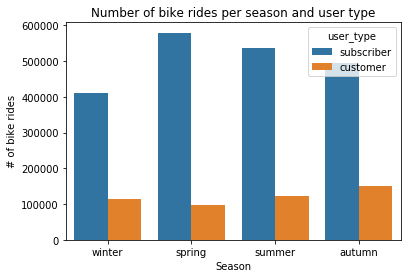

In [57]:
# Number of bike rides per season and user type 
base_color = sns.color_palette()[0]
sns.countplot(data = df_clean, x = 'season', hue = 'user_type');
# plot settings
plt.title('Number of bike rides per season and user type');
plt.ylabel('# of bike rides');
plt.xlabel('Season');
plt.xticks(rotation=0);

In [58]:
df_clean.groupby('user_type').season.value_counts()

user_type   season
customer    autumn    149225
            summer    123121
            winter    115087
            spring     98384
subscriber  spring    579189
            summer    537316
            autumn    494152
            winter    410509
Name: season, dtype: int64

The bike sharing usage of the subscribers is significantly reduced in the winter and has its peak in spring while the one from the customers have its peak within autumn and its dip in spring. 

<a id='summary'></a>
## Summary

The following enumeration lists all findings:

- ~80% of the users are members, while ~20% of the users are casual customers.

- The dataset contains for around 10% of the users no information about the usage of the bike share for all trip. Just about 7% of the users use the bike sharing system for all trip, while most of the users (~83%) do not use the bike share for all trip option.

- Just around 4% of all entries in the dataset contain information about the rental access method. These entries were collected in the months: June, July, November and December. It is unclear why Lyft collected or published just the access methods for these four months. If one takes a closer look at the published data, one sees that around 90% of the users used the app for sharing a bike. 


- Within the weekdays the usage of the bike sharing system is almost on the same level, while the number of bike rentals drop down to 54% during the weekend. It seems that the Lyft Bay Wheels system is mainly used by people working during the week. This hypothesis is supported by the fact that the main usage of the bike sharing system is during the week with high peaks between 7am and 9am as well as between 4pm and 8pm. At the weekend, the number of bike rides is reduced and more spread over the midday. <br>The subscribers have much more bike rides than the customer, but if the number of bike rides is normalized one sees that the distribution of the usage per hour is similar to the ones of the subscribers. Both groups, subscribers and customers use the bike share system more often between 7am and 9am as well as between 4pm and 7pm. As expected is the number of rented bikes the lowest during the late evening and night times. 


- The most bike rentals are registered in July and March, followed by October and April. The least were documented in December followed with a bigger gap by May, February and November. The reduced usage of the bike sharing system in the late autumn and winter month are expected, because the weather is normally worst in these month. But fr further investigation one would need for information about the weather conditions. 

- The least bike rentals are counted in the winter with 21%, while the other three seasons are in the same range of 25.7% for autumn up to 27% for spring. Looking at the individual user type, the bike sharing usage of the subscribers is significantly reduced in the winter and has its peak in spring while the one from the customers have its peak within autumn and its dip in spring. 


- In general, the main usage of the bike sharing system is for short periods of time and short distances, because about 75% of the users rent the bike for 15min or less. This is in line with the observation that more than 75% of the rented bikes have been used for distances less than 2.3km. The mean duration of a shared bike is higher during the weekend than the days within the week for all users. At the same time is the mean distance smaller during the weekend than within the week. These two results indicate that the users taking more time for smaller distances and are therefore are slower on the bike during the weekend. <br> Eye-catching is in addition the fact that the mean duration is higher the customers compared to the subscribers, independent of the day of the week or the distance. 


<a id='references'></a>
## References
Basic information about Bay Wheels: https://en.wikipedia.org/wiki/Bay_Wheels <br>
Data downloaded from: https://www.lyft.com/bikes/bay-wheels/system-data <br>
Bay Wheels Dataset license: https://baywheels-assets.s3.amazonaws.com/data-license-agreement.html <br>
Information about the meteorological temperate seasons: https://en.wikipedia.org/wiki/Season <br>
Haversine formula: https://en.wikipedia.org/wiki/Haversine_formula <br>
Correct Mixed Types after csv_read: https://stackoverflow.com/questions/53460661/pandas-dataframe-mixed-data-types-and-strange-fillna-behaviour <br>
Matplotlib.pyplot documentation: https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.html <br>
Seaborn documentation: http://seaborn.pydata.org/index.html <br>